***An Object-oriented Python optimizer used for linac optimization together with ASTRA and IMPACT-T***

----
# Definition of the optimization problem

\begin{equation}
Min\>f(x),\>w.r.t.\>x\>
\end{equation}
\begin{equation}
s.t.\>g_i(x)<=0,\>i = 1, ..., m
\end{equation}
\begin{equation}
x_{j,lower} <= x_j <= x_{j, upper},\>j=1,2,...,n
\end{equation}

where:
- $f(x)$ is a nonlinear function;
- $g_i(x)$ is a group of linear or nonlinear functions;
- $x_j$ is the vector of design variables;
- $m$ is the number of constraints.
- $n$ is the number of design variables;

----
# System requirements:

- Linux (Ubuntu 14.04, 16.04)
- Python2 > 2.7.6
- [NumPy](http://www.numpy.org/), [Pandas](http://pandas.pydata.org/), [Scipy](https://www.scipy.org/scipylib/index.html)
- [matplotlib](http://matplotlib.org/)(only for visualization)
- [pyOpt](http://www.pyopt.org/)
- [ASTRA](http://www.desy.de/~mpyflo/)
- [IMPACT-T](http://portal.nersc.gov/project/m669/IMPACT-T/)

**Note**
- Set your system environment, **export PYTHONPATH=[your/path/for/LinacOpt/]**.
- Do not use very deep directory to run the simulation. Otherwise the name of the output file may be truncated! (This seems to be a problem with FORTRAN)

----
# Modified pyOpt (not mandatory)
**alpso.py** - Location in the original package: _pyopt/pyOpt/pyALPSO/alpso.py_

The new file will let you know why the optimization converges and print out the value of the augmented Lagrangian term.

----
# Optimizers

Global optimizers: [ALPSO](http://www.pyopt.org/reference/optimizers.alpso.html#module-pyALPSO) and [NSGA2](http://www.pyopt.org/reference/optimizers.nsga2.html#module-pyNSGA2)

Local search optimizers: [SDPEN](http://www.pyopt.org/reference/optimizers.sdpen.html#module-pySDPEN)

_Tips for ALPSO optimizer:_
- Convergence condition:
```
    if (abs(global_distance[0]-global_distance[stopIters-1]) <= \
      dtol*abs(global_distance[stopIters-1]) and \
      abs(global_L[0]-global_L[stopIters-1]) <= \
      rtol*abs(global_L[stopIters-1]) or \
      abs(global_L[0]-global_L[stopIters-1]) <= atol):
      stop_criteria_flag = 1
```
    If the objective is a small number, one must change 'atol' otherwise the optimization will stop prematurely.

- 'dynInnerIter' must be set to 1 in order to make minInnerIter take effect!

----
# Examples

  Three examples are included in the current release: astra_basic, astra_advanced, impact_basic.

## Basic steps for running an optimization.

### Step 1: Assign system path and import modules

In [1]:
import sys
import os
sys.path.append(os.path.expanduser('~') + "/myscripts/linac_optimization/")

from linac_opt import LinacOpt

### Step 2: Instantiate the optimization

In [2]:
opt_test = LinacOpt(path_name='examples/astra_basic',
                    input_file='injector.in',
                    input_template='injector.in.000',
                    particle_type='astra',
                    prob_name='opt_test')

### Step 3: Set up the optimizer

In [3]:
opt_test.set_optimizer('sdpen')
opt_test.optimizer.setOption('alfa_stop', 1e-2)
opt_test.optimizer.setOption('iprint', 0)
opt_test.optimizer.setOption('nf_max', 5000)

### Step 4: Set fit-points

In [4]:
opt_test.fit_points.set_point('out', 'injector.0600.001')

### Step 5: Set objective

In [5]:
def f1(fits):
    return fits.out.emitx*1.e6
opt_test.opt_prob.set_obj('emitx_um', f1)

### Step 6: Set constraint

In [6]:
def g1(fits):
    return fits.out.n0
opt_test.opt_prob.set_con('npar', g1, equal=500)

### Step 7: Add variables


In [7]:
opt_test.opt_prob.set_var('laser_spot', value=0.2, lower=0.1, upper=0.5)
opt_test.opt_prob.set_var('hc_sole_b', value=0.0, lower=0.0, upper=1.0)
opt_test.opt_prob.set_var('main_sole_b', value=0.0, lower=0.0, upper=0.4)
opt_test.opt_prob.set_var('tws1_sole_b', value=0.0, lower=0.0, upper=0.1)
opt_test.opt_prob.set_var('tws2_sole_b', value=0.0, lower=0.0, upper=0.1)

### Step 8: Run the optimization


In [8]:
opt_test.solve('astra')

File removed: opt_test.log.000
File removed: opt_test.sol.000
File removed: opt_test.sol.000.pkl

********************************************************************************
Start solving the following problem with pyOpt.SDPEN on 
astra /home/jun/myscripts/linac_opt/examples/astra_basic/injector.in
********************************************************************************

Optimization Problem -- opt_test-2017-02-01-09-13-41

Objectives:
  Name                Value        Optimum      Function        
  emitx_um             0.0000e+00  -1.0000e+21  f1              

Constraints:
  Name                Value        Bound                                           
  npar                 0.0000e+00  5.0000e+02 - 0.0000e+00 <= g1() <= 5.0000e+02 + 0.0000e+00

Variables (c - continuous, i - integer, d - discrete):
  Name                Type    Value        Lower Bound  Upper Bound
  laser_spot          c        2.0000e-01   1.0000e-01   5.0000e-01
  hc_sole_b           c        0.

----
# Output

**General output:**
- prob_name.log.???: History of the optimization. ??? is the No. of step.
- prob_name.sol.???: Summary of the solution.
- prob_name.sol.???.pkl: Pickle file used for starting from a intermediate step.
- input_file: The input file will be filled with the optimized parameters.

**Output from specific optimizers:**
- ALPSO: ALPSO_print.out
- SDPEN: SDPEN.out.???

----
# Visualization

## Phase-space plot

In [1]:
from beam_plots import PhaseSpacePlot

p1 = PhaseSpacePlot('examples/astra_basic/injector.0600.001', 'astra')
print p1

n                   charge (C)          p                   I_peak (A)      
      5.0000e+02          2.0000e-11          1.8954e+02          3.1735e+00

emitx (m)           emity (m)           Sx (m)              Sy (m)          
      9.9281e-08          9.9786e-08          9.3570e-05          9.3576e-05

betax (m)           betay (m)           alphax              alphay          
      1.6708e+01          1.6624e+01          4.1267e+00          4.0911e+00

St (m)              Sdelta              chirp (1/m)         Ct (s)          
      2.3457e-12          1.3686e-03          4.4739e-01         -1.5088e-24

emitx_slice (m)     emity_slice         Sdelta_slice        St_slice        
      9.3915e-08          1.0004e-07          3.7156e-05          1.7236e-13

Cx (m)              Cy (m)              Cxp (rad)           Cyp (rad)       
     -6.8991e-08          9.6897e-09         -3.1430e-08         -1.2854e-09

emitx_tr (m)        emity_tr (m)        Sdelta_un       
      9.9326e

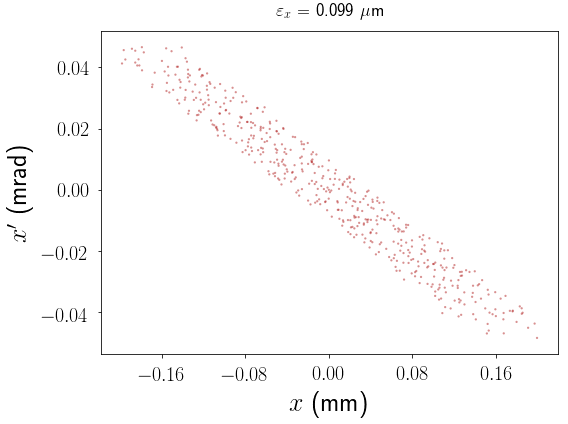

In [5]:
p1.plot('x', 'xp', density_plot=False, marker_color='firebrick', marker_size=5, alpha=0.5)

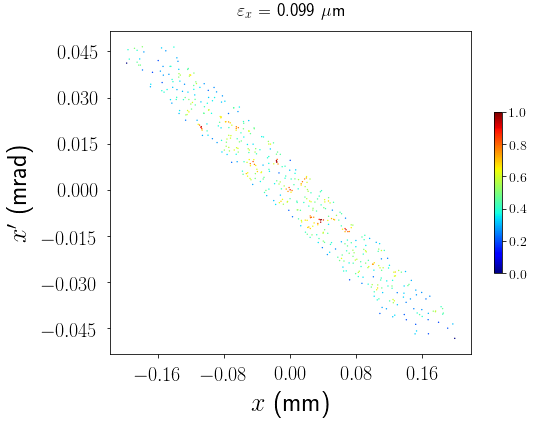

In [22]:
p1.plot('x', 'xp')

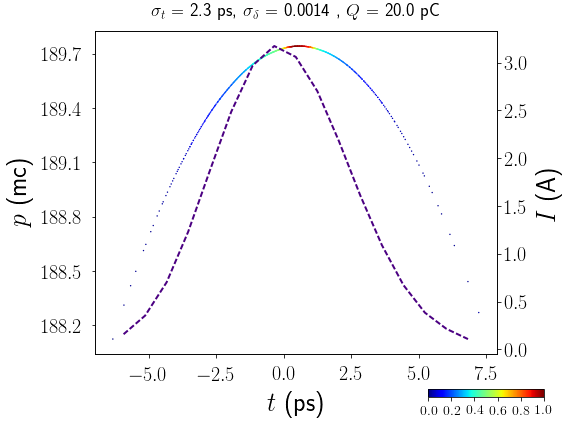

In [21]:
p1.update(current_bins='auto', filter_sigma=1)
p1.plot('t', 'p', x_unit='ps', y1_unit='A', bins_2d=500, sigma_2d=5)

## Line plot

In [9]:
from beam_plots import LinePlot

l1 = LinePlot('examples/astra_basic/injector', 'astra')

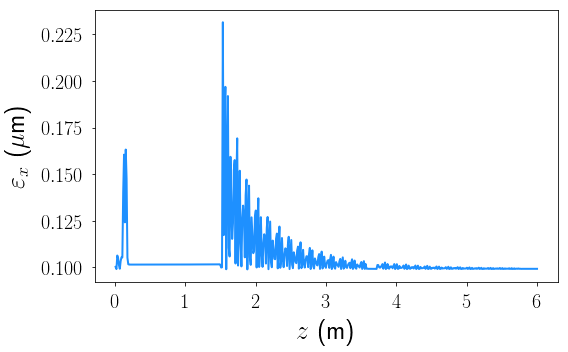

In [10]:
l1.plot('emitx')

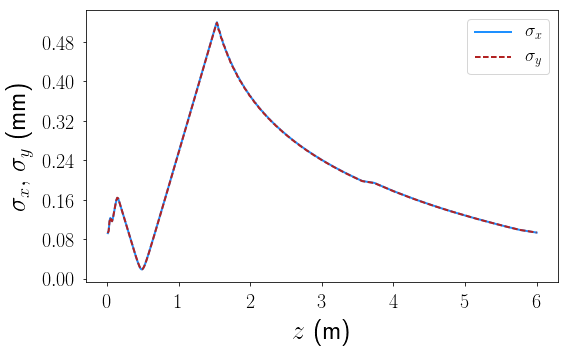

In [14]:
l1.plot(['Sx', 'Sy'])

----
# Class definition

```
class LinacOpt(LinacOptData):
    def __init__(self, path_name=None, input_file=None, input_template=None,
                 particle_type=None, prob_name='opt_prob',
                 restart=None, run_once=False, max_fail=10):
        """Initialization.

        Parameters
        ----------
        path_name: string
            Path of the simulation directory.
        input_file: string
            Name of the input file.
        input_template: string
            Name of the input template file. The patterns (<string>) in
            the template file will be replaced at the beginning of
            each simulation to generate a new input file.
        particle_type: string
            Type of the particle file (corresponding code name).
        prob_name: string
            Root name of log_file and solution_file, default = 'opt_prob'.
        restart: None/int
            None for new run and int for restarting from the
            restart-th run.
        run_once: Boolean
            True for stopping after one simulation. For debug.
        max_fail: int
            Max number of allowed consecutive fails.
        """
```

```
class FitPoints(object):
    """Object with attributes being PhaseSpace objects"""
    def __init__(self, particle_type):
        self.particle_type = particle_type
        
    def set_point(self, name, particle_file, particle_type=None, **kwargs):
        """Add a PhaseSpace object as an attribute

        Parameters
        ----------
        name: string
            Name of the new attribute.
        particle_file: string
            Name of the particle file.
        particle_type: string
            Type of the particle file.
            
        Additional keyword arguments are passed to PhaseSpace.__init__().
        """

    def del_point(self, name):
        """Delete a point by name.

        Parameters
        ----------
        name: string
            Name of the new attribute.
        """


class PhaseSpace(LinacOptData):
    """Store the particle phase-space data and parameters
    
    Attributes
    ----------
    data: pandas.DataFrame object
        Columns: x (m), y (m), z (m), px, py, t (s, dt), p (mc)

    slice_percent: float
        Percentage of particle for slice parameters calculation.
    cut_halo: None/float
        Percentage of halo to be cut.
    cut_tail: None/float
        Percentage of tail to be cut.

    n0: int
        Number of particles in the original file.
    n: int
        Number of particles.
    p: float
        Average normalized momentum.
    gamma: float
        Average Lorentz factor.
    chirp: float
        Energy chirp (1/m), defined as -<z*delta>/<z^2>.
    Sdelta: float
        Fractional energy spread.
    Sdelta_slice: float
        Fractional slice energy spread.
    St: float
        RMS bunch duration (s).
    St_slice: float
        RMS slice bunch duration (s).
    Sz: float
        RMS bunch length (m).
    I_peak: float
        Peak current (A).
    Sdelta_un: float
        Uncorrelated momentum spread.
    emitx/emity: float
        Normalized horizontal/vertical emittance (m.rad).
    emitx_slice/emity_slice: float
        Normalized horizontal/vertical slice emittance (m.rad).
    Sx/Sy: float
        RMS horizontal/vertical beam size (m).
    betax/betay: float
        Horizontal/vertical beta function (m).
    alphax/alphay: float
        Horizontal/vertical alpha function (m).
    emitx_tr/emity_tr: float
        Normalized horizontal/vertical trace space emittance (m.rad)
    Cx/Cy: float
        Horizontal/vertical displacement (m).
    Cxp/Cyp: float
        Horizontal/vertical divergence (rad).
    Ct: float
        Average timing (s).
        
    def __init__(self, particle_file, particle_type, charge=0.0, q_norm=None,
                 slice_percent=0.1, cut_halo=None, cut_tail=None, opt=False):
        """
        Parameters
        ----------
        particle_file: string
            Name of the particle file.
        particle_type: string
            Type of the particle file.
        charge: int/float
            Charge of the beam (in C). Only for Impact data.
            Ignored if q_norm is given.
        q_norm: int/float
            Charge per macro-particle.
        slice_percent: float
            Percentage of particles for slice properties.
        cut_halo: None/float
            Percentage of particles to be removed based on their
            transverse distance to the bunch centroid.
        cut_tail: None/float
            Percentage of particles to be removed based on their
            longitudinal distance to the bunch centroid.
        opt: Boolean
            True for the initialization of the fit-points in linac_opt.
            Since there is no output, an error will occur if the update
            method is called. Default is False.
        """
        
    def update(self, current_bins='auto', filter_sigma=1):
        """Read the phase-space and calculate the beam parameters

        Parameters
        ----------
        current_bins: int/'auto'
            No. of bins to calculate the current profile. Only affect
            the calculation of the peak current.
        filter_sigma: int/float
            Standard deviation of the Gaussian kernel of the 1D Gaussian filter.
        """
```

```
class BeamEvolution(LinacOptData):
    """Store the beam evolution and its statistics

    Attributes
    ----------
    data: pandas.DataFrame object
        z (m), gamma, SdE (eV), Sx (m), Sy (m), Sz (m),
        emitx (m.rad), emity (m.rad), emitz (m.rad),
        emitx_tr (m.rad), emity_tr (m.rad),
        betax (m), betay (m), alphax, alphay

    z: Stats object
        Longitudinal position (m).
    gamma: Stats object
        Lorentz factor.
    SdE: Stats object
        RMS energy spread (eV).
    Sx/Sy/Sz: Stats objects
        RMS bunch sizes (m).
    betax/betay: Stats objects
        Beta functions (m).
    alphax/alphay: Stats objects
        Alpha functions.
    emitx/emity: Stats objects
        Normalized canonical emittance (m.rad).
    emitx_tr/emity_tr: Stats objects
        Normalized trace-space emittance (m.rad).
    """
    def __init__(self, root_name, particle_type, z_lim=None, opt=False):
        """Initialize BeamStats object

        Parameters
        ----------
        root_name: string
            The root name of the output files. For Impact-T files,
            root_name will be set to 'fort' if not given.
        particle_type: string
            Type of the particle file.
        z_lim: scalar/tuple
            If None, passed as (-INF, INF)
            if scalar, being passed as (left, INF)
            if tuple, the first two elements being passed as (left, right)
        opt: Boolean
            True for the initialization of the fit-points in linac_opt.
            Since there is no output, an error will occur if the update
            method is called. Default is False.
        """


class Stats(object):
    """Store the statistic values of an array-like object.

    Attributes
    ----------
    start: float
        First value.
    end: float
        Last value.
    max: float
        Maximum value.
    min: float
        Minimum value.
    ave: float
        Average value.
    std: float
        Standard deviation.
    """


class Sections(object):
    """Object with attributes being BeamEvolution objects"""
    def set_section(self, name, root_name=None, particle_type=None, **kwargs):
        """Add a BeamEvolution object as an attribute

        Parameters
        ----------
        name: string
            Name of the new attribute.
        root_name: string
            The root name of the output files.
        particle_type: string
            Type of the particle file.
            
        Additional keyword arguments are passed to BeamEvolution.__init__().
        """
        try:
            self.__delattr__(name)
            print "\nWarning: section {} will be replaced!".format(name)
        except AttributeError:
            pass

        if root_name is None:
            root_name = self.root_name

        if particle_type is None:
            particle_type = self.particle_type

        this_section = BeamEvolution(root_name, particle_type, opt=True, **kwargs)
        super(Sections, self).__setattr__(name, this_section)

    def del_section(self, name):
        """Delete a section by name.

        Parameters
        ----------
        name: string
            Name of the new attribute.
        """
        super(Sections, self).__delattr__(name)
```

```
class Objective(pyOptObjective):
    """Inherited from pyOpt.Objective class.

    Each Objective object has a function attribute which calculates 
    its value.
    """

    def __init__(self, name, func=None, optimum=-1.0e21):
        """Initialize Objective object

        Parameters
        ----------
        func: function object
            Objective function.
        optimum: None/float
            The object of the objective.
        """
```

```
class Constraint(pyOptConstraint):
    """Inherited from pyOpt.Constraint class.

    One can specify one of the three constraint formats:
    [-INF, upper], [lower, INF] and [equal - tol, equal + tol]
    """
    def __init__(self, name, func=None, **kwargs):
        """Initialize Constraint object.

        Parameters
        ----------
        func: function object
            Name of the constraint function.
        upper: float
            Upper boundary, ignored if lower if specified.
        lower: float
            Lower boundary.
        equal: float
            Equal boundary.
        tol: float
            Tolerance for equal boundary; negative number for percent,
            positive number for absolute value.

        Note: the attributes 'lower' and 'upper' in the pyOpt.constraint
        object does not take effect. In the new Constraint object,
        the normalize() method will convert the value corresponding to
        a constraint type of (-INF, 0] which can then pass to pyOpt.
        """
```

```
class Variable(pyOptVariable):
    """Inherited from pyOpt.Variable class"""
    def __init__(self, name, **kwargs):
        """Initialize Constraint object.

        Parameters
        ----------
        type: string
            Variable Type ('c'-continuous, 'i'-integer, 'd'-discrete),
            *Default* = 'c'
        value: int/float
            Variable Value, *Default* = 0.0
        upper: int/float
            Upper boundary.
        lower: int/float
            Lower boundary.
        """
        

class CoVariable(object):
    """Optimization CoVariable class."""
    def __init__(self, name, var_dp, **kwargs):
        """Initialize CoVariable object

        The value of the variable is calculated by:
        covar = [slope].*[value of var_dp] + intercept

        Parameters
        ----------
        name: string
            Name of the co-variable.
        var_dep: string/list
            Name(s) of the dependent variable(s).
        slope: int/float/list
            Coefficient(s) in calculation.
        intercept: int/float
            Coefficient in calculation.
        """
        
class StaticVariable(object):
    """Optimization StaticVariable class

    Static variable is useful when running concatenate simulations.
    """

    def __init__(self, name, value=None):
        """Initialize StaticVariable object

        Parameters
        ----------
        name: string
            Name of the static variable.
        value: int/float
            Value of the static variable. The value will be ignored
            if a variable with the same name is found in the variable
            set or co-variable set of the solution.
        """
```

```
def solve(self, run_code=None):
    """Run the optimization and print the result.

    Parameters
    ----------
    run_code: string
        String that can run the code in the shell.
    """
```